**Extreme Weather Conditions**


---

> Heavy rainfall and dangerously strong winds can unleash a cascade of devastating natural disasters. It stirs emotions by evoking fear, loss, and resilience in the face of floods, cyclones, and thunderstorms.
> High humidity and temperature can contribute to the conditions that increase the likelihood or severity of certain types of natural disasters.



1.  Floods: Heavy rainfall over an extended period or intense rainfall within a short duration causes the soil to become saturated. Excess water accumulates on the surface, leading to overflowing rivers, lakes, and drainage systems. This excessive runoff causes flooding, damaging infrastructure, disrupting transportation, and endangering lives.


2.  Cyclones: Warm ocean waters provide the energy for cyclones to form and intensify. When the cyclone travels across the ocean, the associated moisture content increses. It is released as heavy rainfall when the cyclone makes landfall. The combination of strong winds and heavy rainfall may result in severe flooding and storm surges.


3. Thunderstorms: Thunderstorms often result from unstable atmospheric conditions. When the moist air rises and cools, it forms clouds producing heavy rainfall. Intense rainfall within thunderstorms can lead to localized flash flooding, as the ground may be unable to absorb the rapid influx of water.


4. Heatwaves: High humidity, combined with high temperatures, can exacerbate the impacts of heatwaves. When humidity is high, the body's ability to cool itself through sweating is reduced, leading to increased discomfort and heat-related illnesses. Prolonged exposure to extreme heat and humidity can be dangerous.


# Importing Dependencies


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In [ ]:
df = pd.read_csv('WeatherData.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Preprocessing

In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.00,96453.00,96453.00,96453.00,96453.00,96453.00,96453.00,96453.00
mean,11.93,10.86,0.73,10.81,187.51,10.35,0.00,1003.24
std,9.55,10.70,0.20,6.91,107.38,4.19,0.00,116.97
min,-21.82,-27.72,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.69,2.31,0.60,5.83,116.00,8.34,0.00,1011.90
50%,12.00,12.00,0.78,9.97,180.00,10.05,0.00,1016.45
75%,18.84,18.84,0.89,14.14,290.00,14.81,0.00,1021.09
max,39.91,39.34,1.00,63.85,359.00,16.10,0.00,1046.38


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
df.sort_values(by='Formatted Date')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
2880,2006-01-01 00:00:00.000 +0100,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
2881,2006-01-01 01:00:00.000 +0100,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2882,2006-01-01 02:00:00.000 +0100,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
2883,2006-01-01 03:00:00.000 +0100,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
2884,2006-01-01 04:00:00.000 +0100,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
89728,2016-12-31 19:00:00.000 +0100,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,0.0,1020.03,Mostly cloudy throughout the day.
89729,2016-12-31 20:00:00.000 +0100,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,0.0,1020.27,Mostly cloudy throughout the day.
89730,2016-12-31 21:00:00.000 +0100,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,0.0,1020.50,Mostly cloudy throughout the day.
89731,2016-12-31 22:00:00.000 +0100,Mostly Cloudy,snow,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,0.0,1020.65,Mostly cloudy throughout the day.


In [ ]:
df['Date'] = df['Formatted Date'].apply(lambda char: str(char)[:11]).apply(lambda value: None if value == "" else value)

In [ ]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251.00,15.83,0.00,1015.13,Partly cloudy throughout the day.,2006-04-01
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259.00,15.83,0.00,1015.63,Partly cloudy throughout the day.,2006-04-01
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204.00,14.96,0.00,1015.94,Partly cloudy throughout the day.,2006-04-01
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.29,5.94,0.83,14.10,269.00,15.83,0.00,1016.41,Partly cloudy throughout the day.,2006-04-01
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.76,6.98,0.83,11.04,259.00,15.83,0.00,1016.51,Partly cloudy throughout the day.,2006-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.02,26.02,0.43,11.00,31.00,16.10,0.00,1014.36,Partly cloudy starting in the morning.,2016-09-09
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.58,24.58,0.48,10.09,20.00,15.55,0.00,1015.16,Partly cloudy starting in the morning.,2016-09-09
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.04,22.04,0.56,8.98,30.00,16.10,0.00,1015.66,Partly cloudy starting in the morning.,2016-09-09
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.52,21.52,0.60,10.53,20.00,16.10,0.00,1015.95,Partly cloudy starting in the morning.,2016-09-09


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.drop(['Daily Summary','Loud Cover'],axis=1,inplace=True)

In [ ]:
df.columns[df.isnull().any()]

Index(['Precip Type'], dtype='object')

In [ ]:
df.dropna()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [ ]:
df.shape

(96453, 11)

# Data Visualization

<Figure size 1200x800 with 0 Axes>

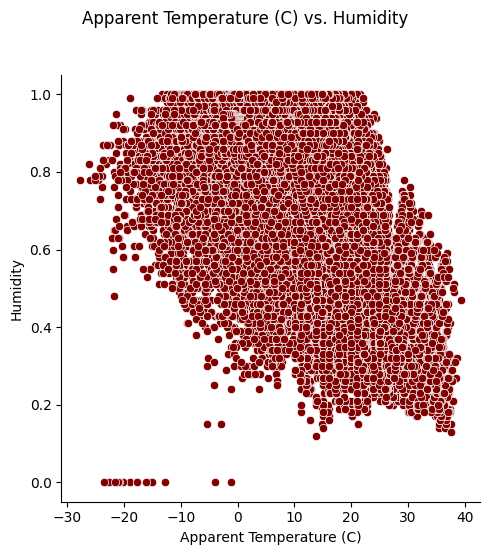

In [ ]:
#Plotting scatter plots
plt.figure(figsize=(12,8))
g = sns.relplot(x='Apparent Temperature (C)', y='Humidity', data=df, kind="scatter", color="maroon")
g.fig.suptitle("Apparent Temperature (C) vs. Humidity",y=1.1)
plt.show()

<Figure size 1200x800 with 0 Axes>

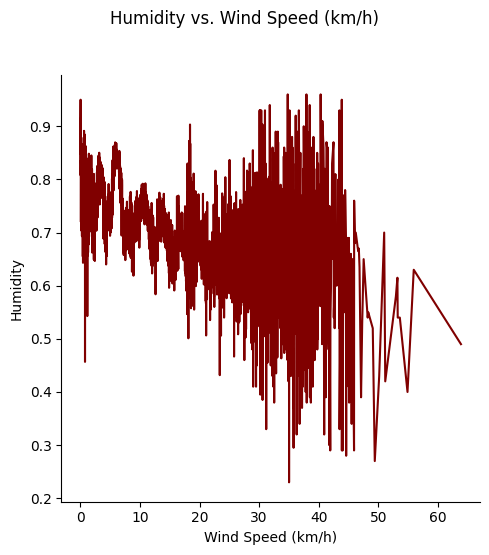

In [ ]:
plt.figure(figsize=(12,8))
g = sns.relplot(x='Wind Speed (km/h)',y='Humidity', data=df, kind="line", color="maroon", ci=None)
g.fig.suptitle("Humidity vs. Wind Speed (km/h)",y=1.1)
plt.show()

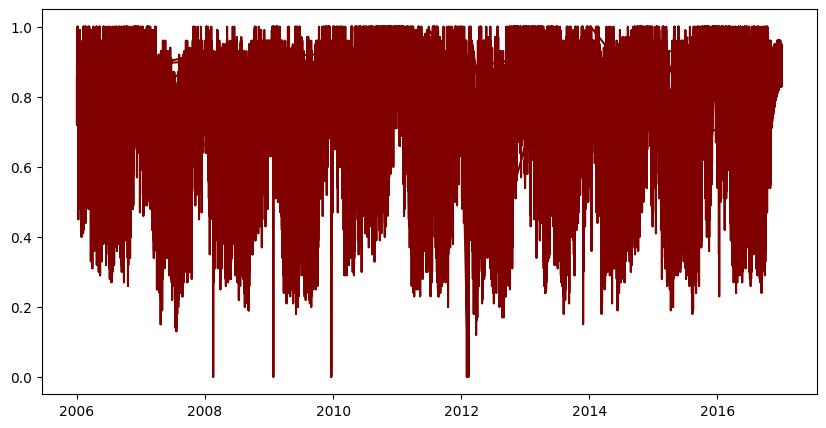

In [ ]:
#Plotting time series curve
plt.figure(figsize=(10,5))
plt.plot(df.Date,df.Humidity,color='maroon')
plt.show()

In [ ]:
numeric_columns = []
for column in df.columns:
    if df.dtypes[column] !="object":
        numeric_columns.append(column)
print(numeric_columns)

['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Date']


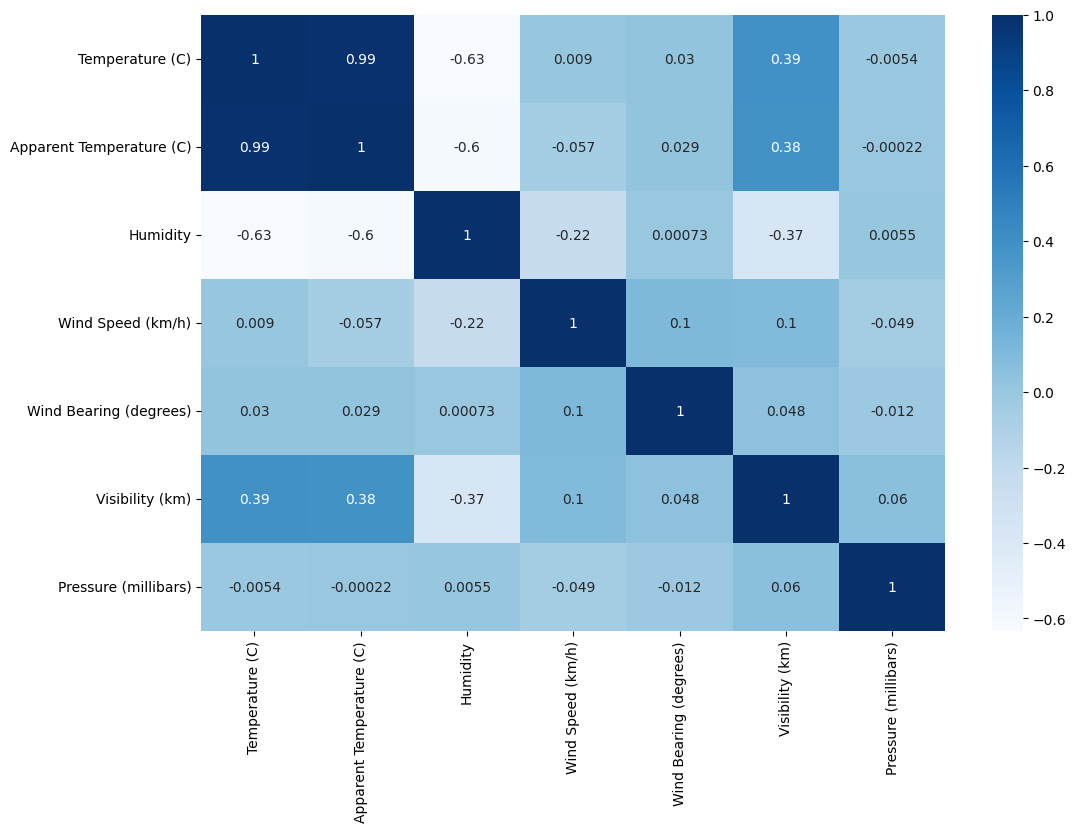

In [ ]:
corr_mat = df[numeric_columns].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap="Blues")
plt.show()

            Temperature (C)  Apparent Temperature (C)  Humidity  \
Date                                                              
2006-01-01             3.87                     -0.45      0.82   
2006-01-02             5.42                      2.04      0.84   
2006-01-03             2.32                      0.22      0.90   
2006-01-04             2.27                     -0.46      0.91   
2006-01-05             2.70                      0.26      0.95   
...                     ...                       ...       ...   
2016-12-27             0.28                     -3.16      0.89   
2016-12-28             0.22                     -3.22      0.89   
2016-12-29             0.17                     -3.27      0.89   
2016-12-30             0.12                     -3.31      0.89   
2016-12-31             0.07                     -3.35      0.89   

            Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
Date                                                  

<Axes: xlabel='Date'>

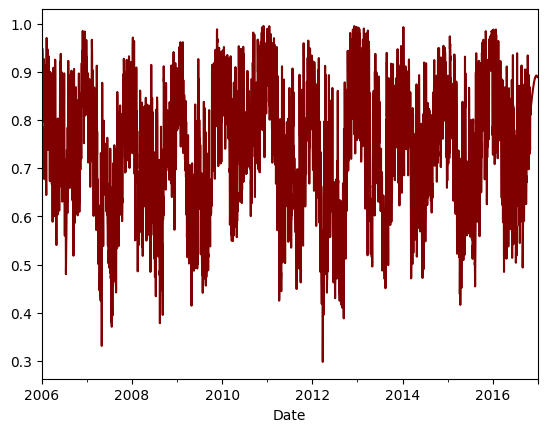

In [ ]:
#Grouping the dataset
df_datewise = df.groupby(by='Date').mean()
print(df_datewise)
df_datewise.Humidity.plot(color='maroon')

<Figure size 1600x600 with 0 Axes>

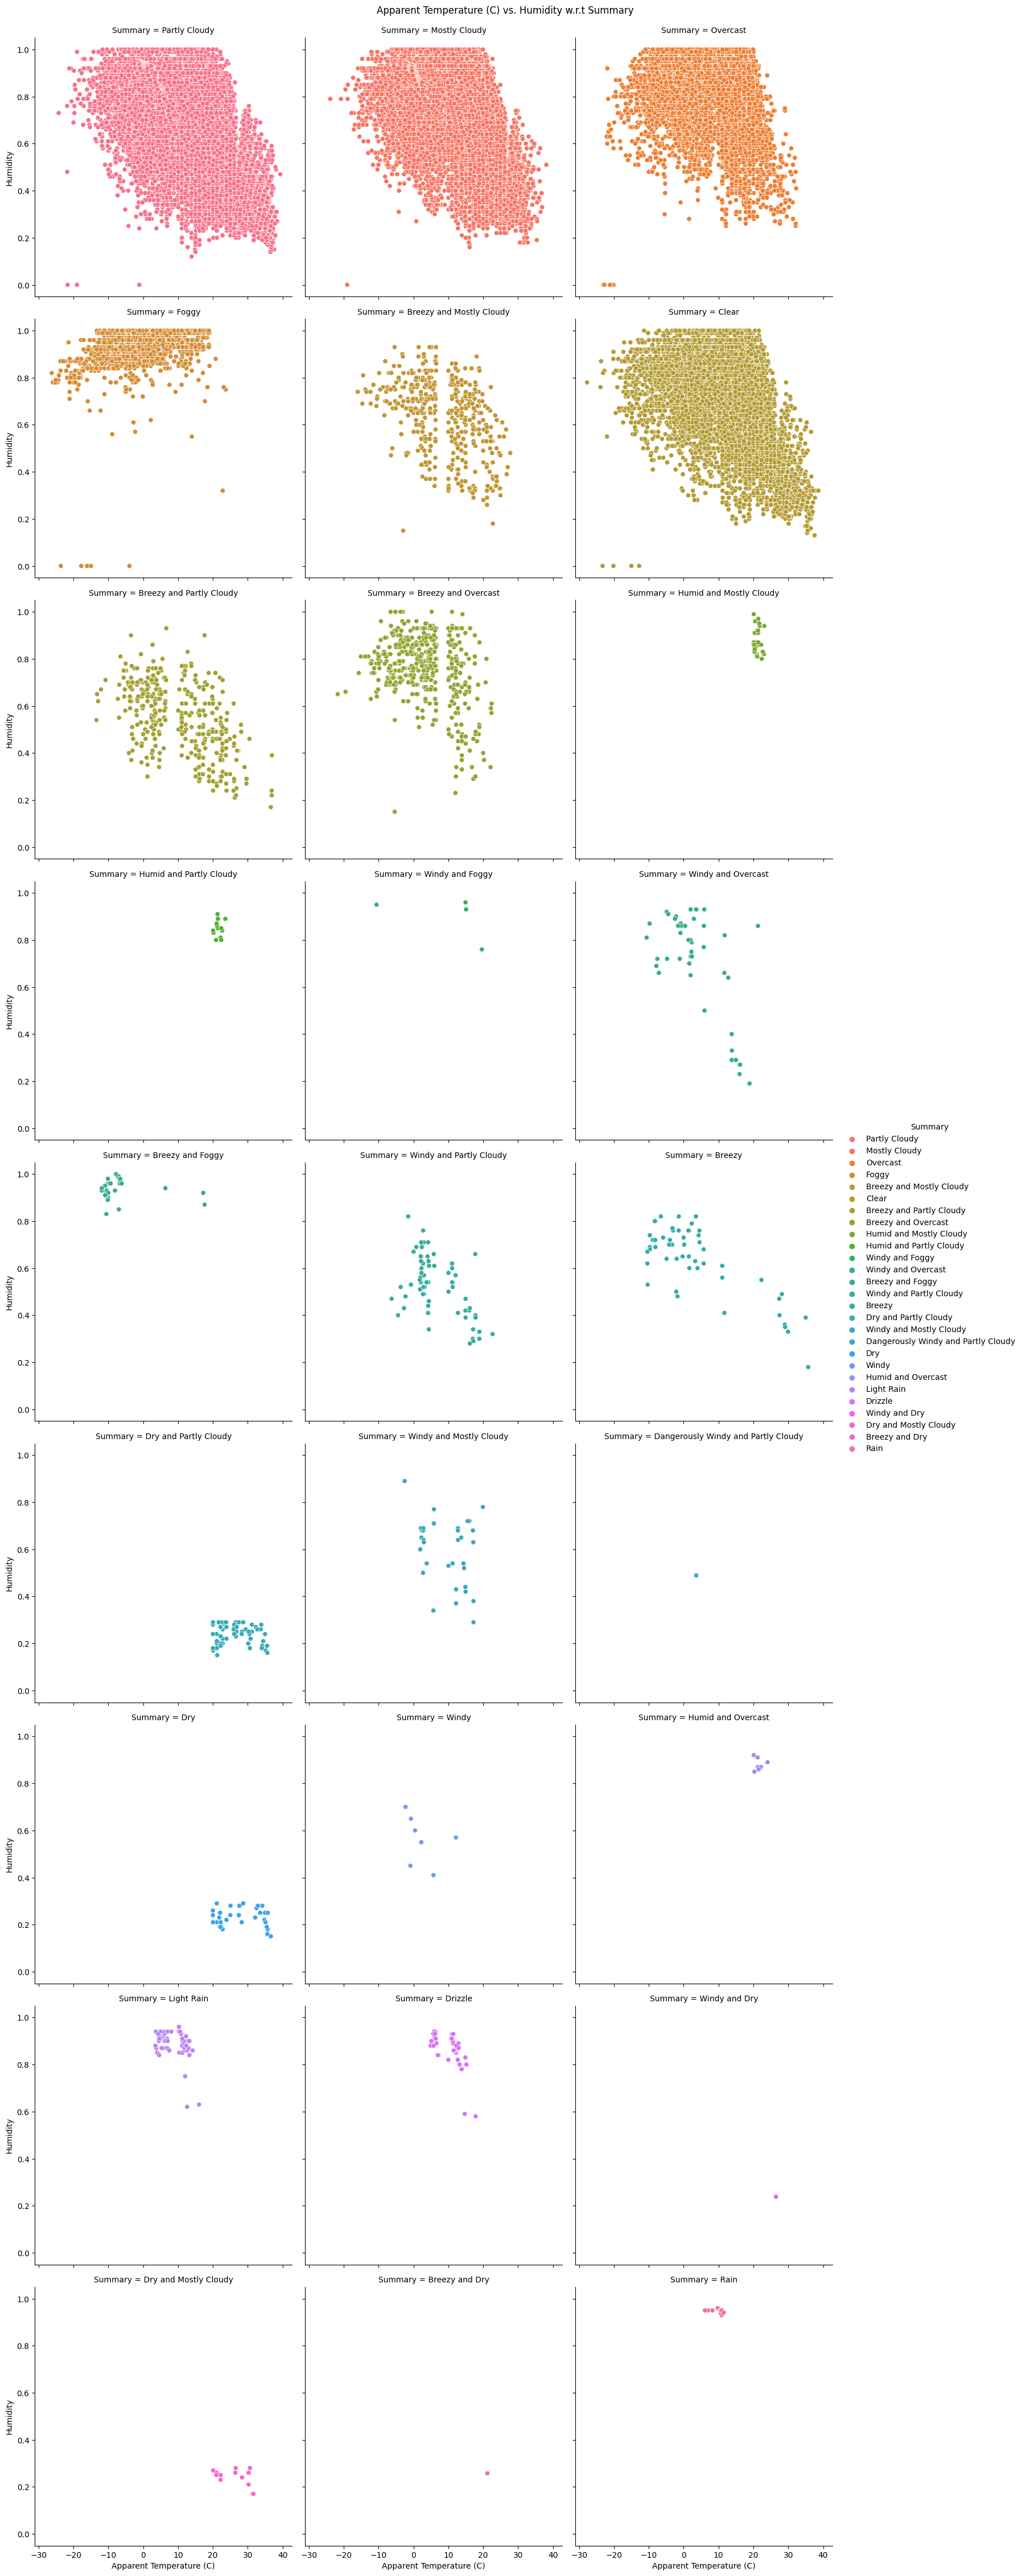

In [ ]:
plt.figure(figsize=(16,6))
g = sns.relplot(x='Apparent Temperature (C)',y='Humidity',color='purple',hue="Summary",data=df, col="Summary", col_wrap=3)
g.fig.suptitle("Apparent Temperature (C) vs. Humidity w.r.t Summary",y=1.005)
plt.show()

<Axes: xlabel='Summary', ylabel='Temperature (C)'>

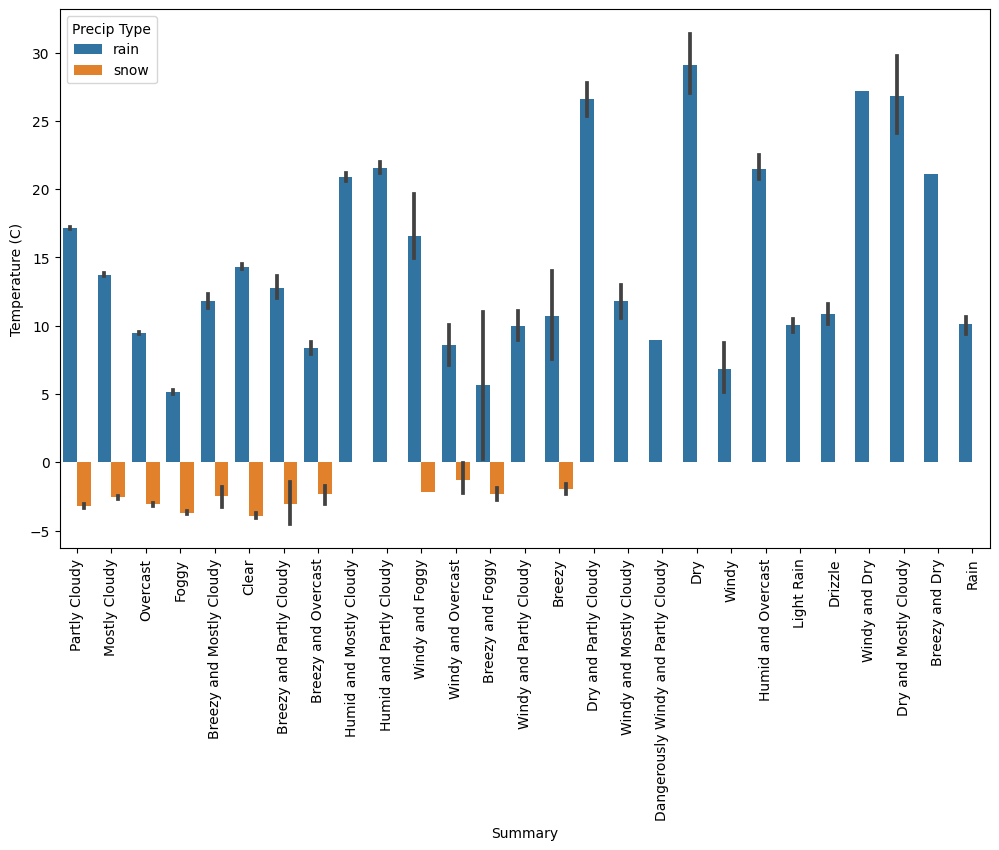

In [ ]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(data=df, x="Summary", y="Temperature (C)",hue="Precip Type")

In [ ]:
target_values=df['Summary'].value_counts().index
target_values

Int64Index([19, 17, 18,  6, 12,  4,  3,  5, 11, 26, 16,  0, 25, 13,  8,  2, 24,
             9, 15, 10, 20, 21, 14, 23, 22,  7,  1],
           dtype='int64')

# Encoding Target Values

In [ ]:
label=LabelEncoder()
df['Summary']=label.fit_transform(df['Summary'])
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,19,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,19,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,17,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,19,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,17,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


# Splitting Dataset


In [ ]:
df.drop('Precip Type',axis=1,inplace=True)

In [ ]:
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
y=df.iloc[:,0]
x=df.iloc[:,1:]

In [ ]:
x

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,19,9.47,7.39,0.89,14.12,251.00,15.83,1015.13
1,19,9.36,7.23,0.86,14.26,259.00,15.83,1015.63
2,17,9.38,9.38,0.89,3.93,204.00,14.96,1015.94
3,19,8.29,5.94,0.83,14.10,269.00,15.83,1016.41
4,17,8.76,6.98,0.83,11.04,259.00,15.83,1016.51
...,...,...,...,...,...,...,...,...
96448,19,26.02,26.02,0.43,11.00,31.00,16.10,1014.36
96449,19,24.58,24.58,0.48,10.09,20.00,15.55,1015.16
96450,19,22.04,22.04,0.56,8.98,30.00,16.10,1015.66
96451,19,21.52,21.52,0.60,10.53,20.00,16.10,1015.95


In [ ]:
y

0        2006-04-01 00:00:00.000 +0200
1        2006-04-01 01:00:00.000 +0200
2        2006-04-01 02:00:00.000 +0200
3        2006-04-01 03:00:00.000 +0200
4        2006-04-01 04:00:00.000 +0200
                     ...              
96448    2016-09-09 19:00:00.000 +0200
96449    2016-09-09 20:00:00.000 +0200
96450    2016-09-09 21:00:00.000 +0200
96451    2016-09-09 22:00:00.000 +0200
96452    2016-09-09 23:00:00.000 +0200
Name: Formatted Date, Length: 96453, dtype: object

In [ ]:
x_cols=x.columns

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
x.corr()

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Summary,1.00,0.15,0.14,-0.11,0.00,0.02,0.14,0.14
Temperature (C),0.15,1.00,0.99,-0.63,0.01,0.03,0.39,-0.01
Apparent Temperature (C),0.14,0.99,1.00,-0.60,-0.06,0.03,0.38,-0.00
Humidity,-0.11,-0.63,-0.60,1.00,-0.22,0.00,-0.37,0.01
Wind Speed (km/h),0.00,0.01,-0.06,-0.22,1.00,0.10,0.10,-0.05
Wind Bearing (degrees),0.02,0.03,0.03,0.00,0.10,1.00,0.05,-0.01
Visibility (km),0.14,0.39,0.38,-0.37,0.10,0.05,1.00,0.06
Pressure (millibars),0.14,-0.01,-0.00,0.01,-0.05,-0.01,0.06,1.00


In [ ]:
x_train

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
42675,18,8.31,6.47,0.93,10.92,251.00,8.13,1004.97
86049,17,8.95,7.48,0.71,9.50,213.00,10.58,1019.72
65729,19,29.84,30.07,0.45,20.95,8.00,11.40,1021.14
85224,18,9.38,7.76,0.96,10.82,271.00,6.20,1017.08
81213,6,-1.81,-1.81,0.88,0.00,0.00,7.04,1029.83
...,...,...,...,...,...,...,...,...
21440,19,19.63,19.63,0.67,13.40,304.00,9.98,1016.48
73349,18,7.20,3.83,0.87,20.27,130.00,9.80,1003.58
50057,19,22.07,22.07,0.65,20.70,49.00,11.27,1020.90
5192,2,-2.20,-10.14,0.89,38.08,20.00,0.35,1014.71


In [ ]:
x_train.shape

(67517, 8)

In [ ]:
x_test

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
9597,17,18.94,18.94,0.84,7.79,233.00,9.98,1008.04
26204,19,24.12,24.12,0.46,7.86,209.00,10.35,1012.41
6282,17,20.09,20.09,0.60,10.95,346.00,9.98,1019.48
92330,18,14.47,14.47,0.99,15.41,291.00,6.84,1011.14
51067,17,9.72,7.41,0.67,16.47,149.00,9.90,1023.45
...,...,...,...,...,...,...,...,...
78953,19,12.56,12.56,0.41,10.55,142.00,15.18,1025.09
87786,17,17.08,17.08,0.67,4.75,141.00,16.10,1004.80
82663,19,22.83,22.83,0.62,14.47,300.00,9.98,1016.22
34551,17,27.78,27.35,0.38,14.49,150.00,9.98,1014.30


In [ ]:
x_test.shape

(28936, 8)

In [ ]:
x_train=pd.DataFrame(x_train,columns=x_cols)
x_test=pd.DataFrame(x_test,columns=x_cols)

x_train

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
42675,18,8.311111,6.466667,0.93,10.9158,251.0,8.1305,1004.97
86049,17,8.950000,7.483333,0.71,9.4990,213.0,10.5777,1019.72
65729,19,29.844444,30.066667,0.45,20.9461,8.0,11.3988,1021.14
85224,18,9.377778,7.761111,0.96,10.8192,271.0,6.1985,1017.08
81213,6,-1.805556,-1.805556,0.88,0.0000,0.0,7.0357,1029.83
...,...,...,...,...,...,...,...,...
21440,19,19.633333,19.633333,0.67,13.3952,304.0,9.9820,1016.48
73349,18,7.200000,3.827778,0.87,20.2699,130.0,9.8049,1003.58
50057,19,22.066667,22.066667,0.65,20.7046,49.0,11.2700,1020.90
5192,2,-2.200000,-10.138889,0.89,38.0765,20.0,0.3542,1014.71


In [ ]:
y_train

42675    2010-10-20 04:00:00.000 +0200
86049    2015-11-30 13:00:00.000 +0100
65729    2013-07-08 17:00:00.000 +0200
85224    2015-05-28 04:00:00.000 +0200
81213    2015-02-13 00:00:00.000 +0100
                     ...              
21440    2008-07-19 08:00:00.000 +0200
73349    2014-01-21 05:00:00.000 +0100
50057    2011-05-23 18:00:00.000 +0200
5192     2006-03-13 08:00:00.000 +0100
77708    2014-10-02 00:00:00.000 +0200
Name: Formatted Date, Length: 67517, dtype: object

# **Gaussian Naive Bayes**


---

It is the easiest and one of the most rapid classification methods available, and it is well suited for dealing with enormous amounts of information. It makes predictions about unknown classes using the Bayes theory of probability.



In [ ]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test,y_pred) #0.4726983688139342

# **Random Forest Classifier**


---


A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


In [ ]:
rf=RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test,y_pred) #0.563035664915676